In [474]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [475]:
current_dir = os.getcwd()
src_path = os.path.join(current_dir, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)

import FVM
import grid
from misc import calc_MSE_grid,  calc_MSE

In [472]:
grid1 = grid.grid(L=1, N=30)
grid1_history = FVM.run_sim(grid1, max_level=3, bc_type='outflow',
            prob='sod', solve_method='old',
            epsilon=1e-6, t_final=0.2, 
            dt_type='euler', dx_type='godunov')

Using godunov in spatial and euler in temporal.
Using zero-th order reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:01<00:00,  5.53s/s]                

FINISHED


In [ ]:
run_sim(L=1, N=30, max_level=3,
        bc_type='outflow', prob='sod',
        solve_method='old', epsilon=1e-6,
        t_final=0.2, dt_type='euler', dx_type='godunov')
"""
# Error of Godunov
grid1 = grid.grid(L=1, N=30)
grid1.max_level = 3

refine_epsilon = np.inf
grid1, init_con = problem.sod_rod_tube(grid1)
grid1_history = FVM.solve(FVM.HLL_flux, grid1, t_final=0.3, refine_epsilon=refine_epsilon, coarse_epsilon=refine_epsilon*10, dt_type='euler', dx_type="godunov")
#grid1_history = FVM.new_solve(FVM.HLL_flux, grid1, t_final=0.3, epsilon=refine_epsilon, dt_type='euler', dx_type="godunov")
viz.plot_amr_grid(grid1)
viz.plot_amr_value(grid1, analytic = init_con)
calc_MSE_grid(grid1_history[-1])
"""

Using godunov in spatial and euler in temporal.
Using zero-th order reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  4.46s/s]                

FINISHED


'\n# Error of Godunov\ngrid1 = grid.grid(L=1, N=30)\ngrid1.max_level = 3\n\nrefine_epsilon = np.inf\ngrid1, init_con = problem.sod_rod_tube(grid1)\ngrid1_history = FVM.solve(FVM.HLL_flux, grid1, t_final=0.3, refine_epsilon=refine_epsilon, coarse_epsilon=refine_epsilon*10, dt_type=\'euler\', dx_type="godunov")\n#grid1_history = FVM.new_solve(FVM.HLL_flux, grid1, t_final=0.3, epsilon=refine_epsilon, dt_type=\'euler\', dx_type="godunov")\nviz.plot_amr_grid(grid1)\nviz.plot_amr_value(grid1, analytic = init_con)\ncalc_MSE_grid(grid1_history[-1])\n'

Using MUSCL in spatial and euler in temporal.
Using linear reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:00<00:00,  4.05s/s]                 


FINISHED


0.020806731753863533

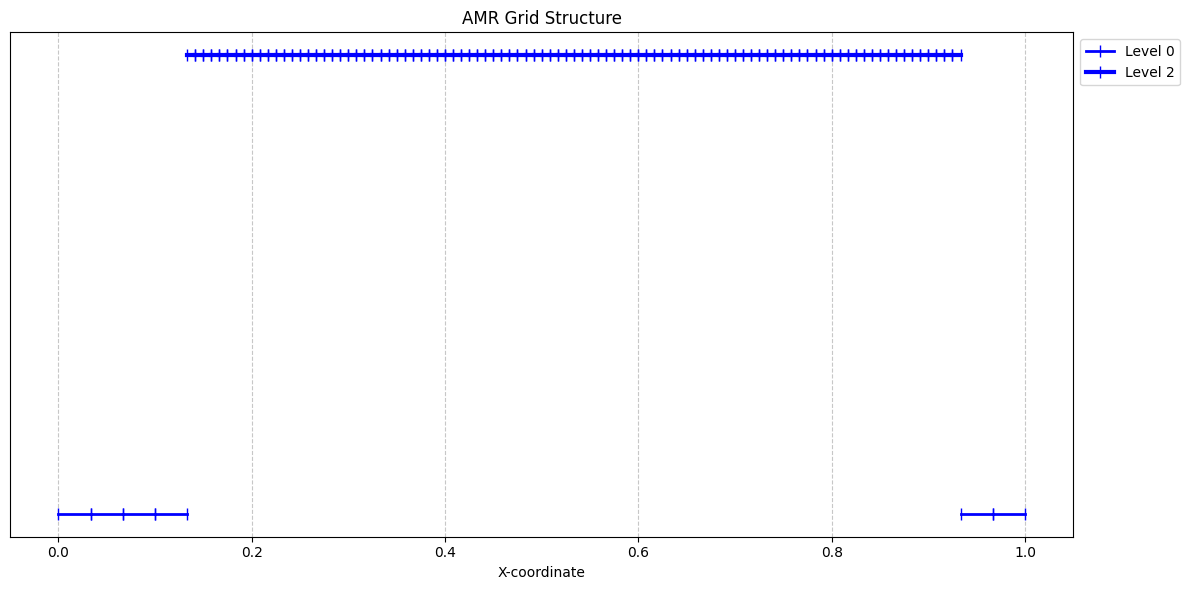

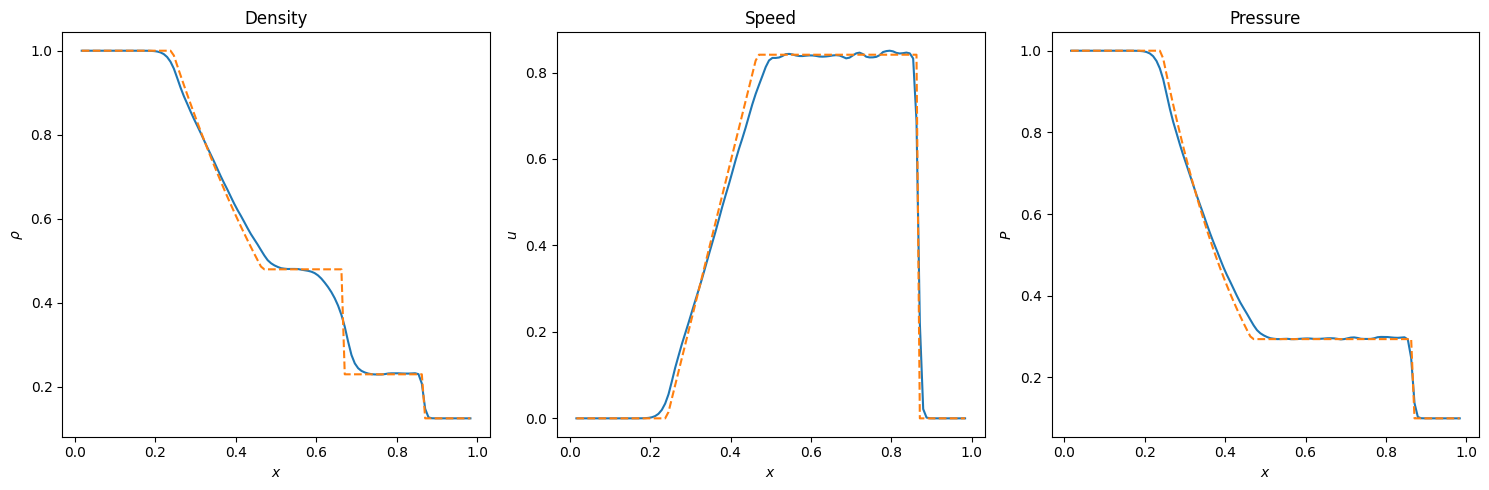

In [464]:
# Error of MUSCL
MUSCL_sod, sod_init_con = run_sim(L=1, N=30, max_level=3,
        bc_type='outflow', prob='sod',
        solve_method='old', epsilon=1e-6,
        t_final=0.2, dt_type='euler', dx_type='MUSCL')

viz.plot_amr_grid(MUSCL_sod[-1])
viz.plot_amr_value(MUSCL_sod[-1], type='sod', init_con=sod_init_con)
calc_MSE_grid(MUSCL_sod[-1], 'sod', sod_init_con)

Using PPM in spatial and euler in temporal.
Using PPM reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:01<00:00,  6.17s/s]                


FINISHED


0.022926271288250363

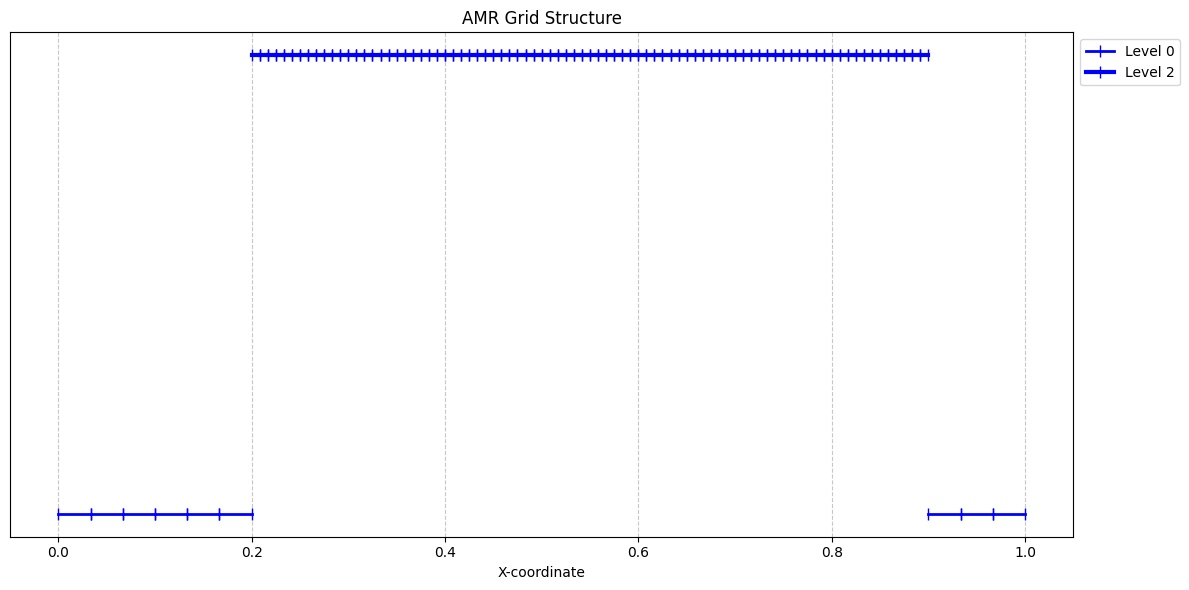

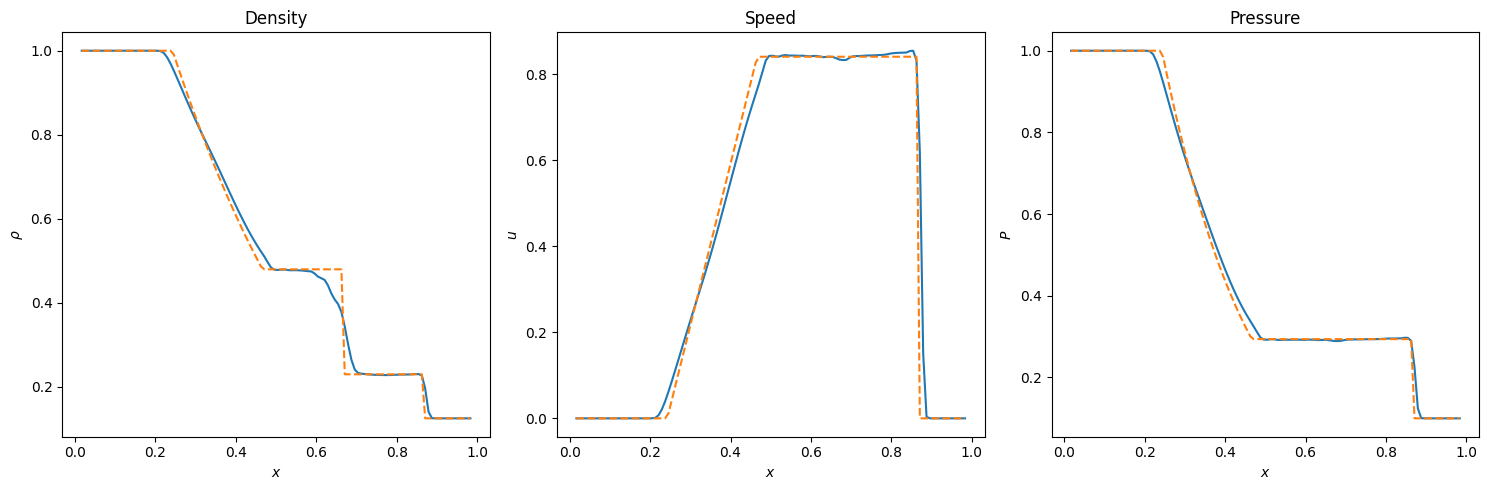

In [465]:
# Error of MUSCL
PPM_sod, sod_init_con = run_sim(L=1, N=30, max_level=3,
        bc_type='outflow', prob='sod',
        solve_method='old', epsilon=1e-6,
        t_final=0.2, dt_type='euler', dx_type='PPM')

viz.plot_amr_grid(PPM_sod[-1])
viz.plot_amr_value(PPM_sod[-1], type='sod', init_con=sod_init_con)
calc_MSE_grid(PPM_sod[-1], 'sod', sod_init_con)

Using PPM in spatial and euler in temporal.
Using PPM reconstruction


Solving Simulation: 100%|██████████| 0.2/0.2 [00:01<00:00,  6.63s/s]                


FINISHED


0.022926271288250363

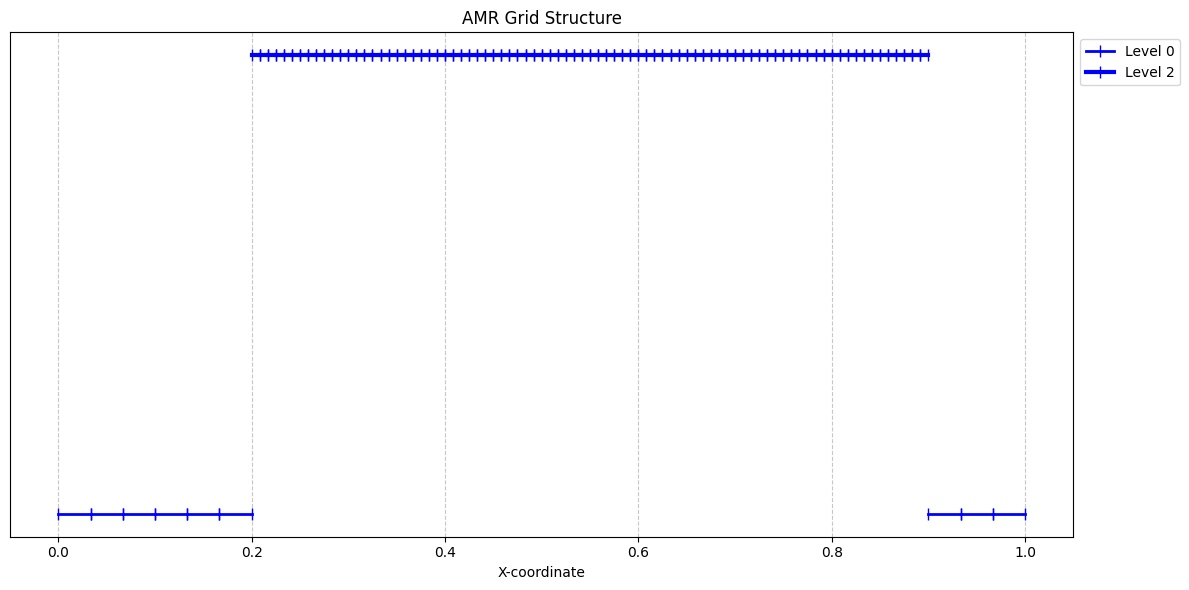

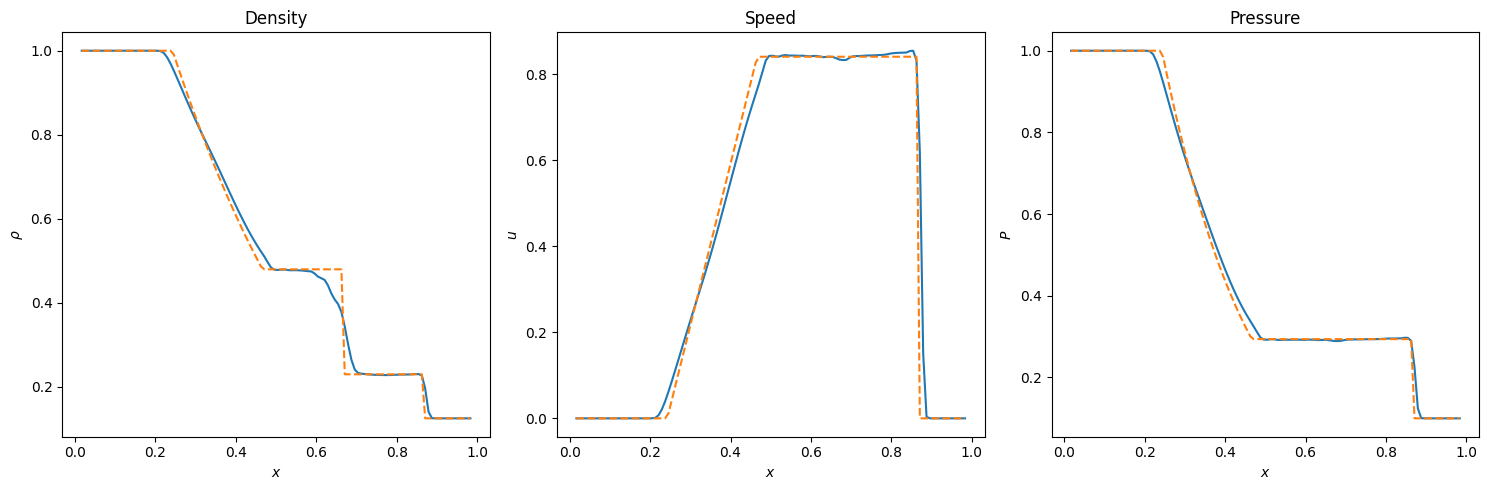

In [466]:
PPM_sod, sod_init_con = run_sim(L=1, N=30, max_level=3,
        bc_type='outflow', prob='sod',
        solve_method='old', epsilon=1e-6,
        t_final=0.2, dt_type='euler', dx_type='PPM')

viz.plot_amr_grid(PPM_sod[-1])
viz.plot_amr_value(PPM_sod[-1], type='sod', init_con=sod_init_con)
calc_MSE_grid(PPM_sod[-1], 'sod', sod_init_con)

 99%|█████████▉| 120/121 [01:24<00:00,  1.41it/s]


1.000001 0.999999
Preparing animation with 121 frames for display...


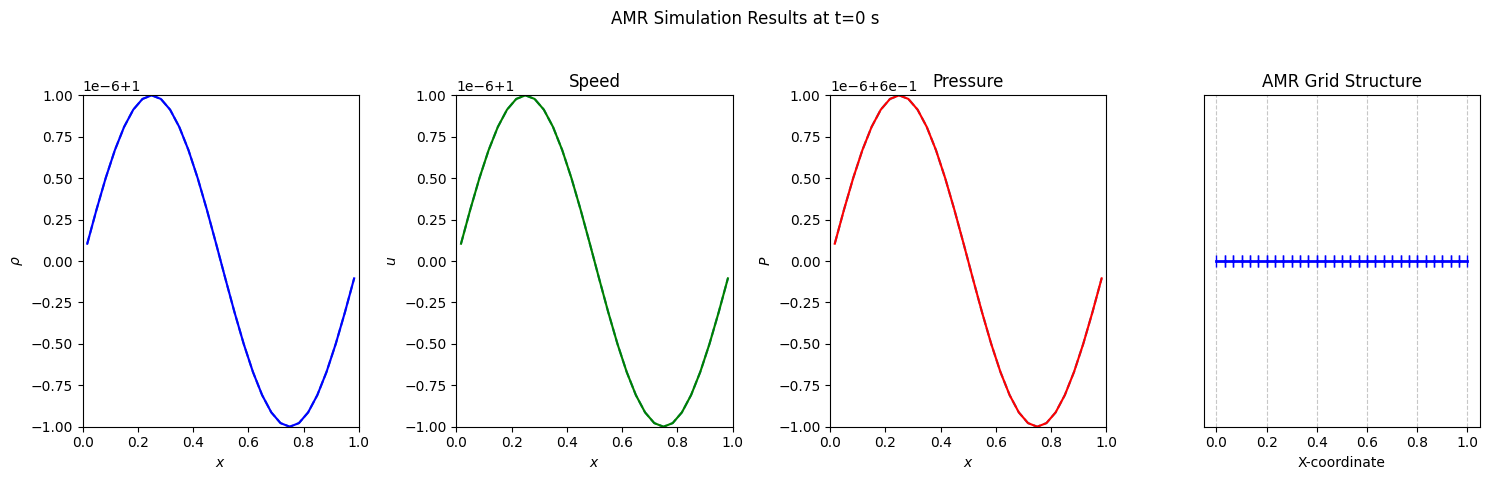

In [408]:
viz.animate(grid1_history, 'plot/test5.gif', fps=len(grid1_history)/5, type='plane', init_con=init_con)